<font color='#0066CC' size='6'>**EDA Supermarket sales**</font>  

<font size='5'>**Данные :**</font>  
скачать данные `!kaggle datasets download -d aungpyaeap/supermarket-sales`


<font size='5'>**Описание данных :**</font>  
 https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/data

`Invoice id`: Идентификационный номер счета-фактуры, созданный компьютером

`Branch`: Филиал супермаркета (доступны 3 филиала, обозначенные A, B и C).

`City`: Расположение супермаркетов

`Customer type`: Тип клиентов, зарегистрированный Участниками для клиентов, использующих карту участника, и Обычный для клиентов без карты участника.

`Gender`: Пол типа клиента

`Product line`: Общие группы категоризации товаров - Электронные аксессуары, Модные аксессуары, Еда и напитки, Здоровье и красота, Дом и образ жизни, Спорт и путешествия.

`Unit price`: Цена каждого товара в $

`Quantity`: Количество товаров, купленных клиентом

`Tax`: Налоговый сбор в размере 5% за покупку клиента

`Total`: Общая стоимость, включая налог

`Date`: Дата покупки (Запись доступна с января 2019 г. по март 2019 г.)

`Time`: Время покупки (с 10:00 до 21:00).

`Payment`: Оплата, используемая покупателем для покупки (доступны 3 метода: наличными, кредитной картой и электронным кошельком)

`COGS`: Стоимость проданного товара

`Gross margin percentage`: Процент валовой прибыли

`Gross income`: Валовой доход

`Rating`: Рейтинг стратификации клиентов по их общему опыту покупок (по шкале от 1 до 10)

# <font color='#0066CC' size='5'> **Импорт и установка библиотек**

In [ ]:
!pip install kaggle -q

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# <font color='#0066CC' size='5'> **Загрузка датасета**

In [ ]:
!kaggle datasets download -d aungpyaeap/supermarket-sales

Dataset URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
License(s): other
  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 38.1MB/s]


In [ ]:
# распаковка скачаннного архива датасета
!unzip /content/supermarket-sales.zip

Archive:  /content/supermarket-sales.zip
  inflating: supermarket_sales - Sheet1.csv  


In [ ]:
# Чтение распакованного датасета
supermarket = pd.read_csv('supermarket_sales - Sheet1.csv')
print(supermarket.shape)

supermarket.head()

(1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# <font color='#0066CC' size='5'> **Разведочный анализ данных**

## Статистики

In [ ]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
pd.DataFrame({
    'cont': [supermarket.shape[0]] * len(supermarket.columns),  # Количество строк в таблице
    'nuls': supermarket.isnull().sum(),  # Количество пропущенных значений (NaN)
    'isna': supermarket.isna().sum(),  # Количество значений isna (эквивалентно nuls)
    'uniqueness': supermarket.nunique(),  # Количество уникальных значений в каждом столбце
    'duplicates': [supermarket.duplicated().sum()] * len(supermarket.columns),  # Количество дубликатов
    'data type': supermarket.dtypes  # Тип данных каждого столбца
})

,cont,nuls,isna,uniqueness,duplicates,data type
Invoice ID,1000,0,0,1000,0,object
Branch,1000,0,0,3,0,object
City,1000,0,0,3,0,object
Customer type,1000,0,0,2,0,object
Gender,1000,0,0,2,0,object
Product line,1000,0,0,6,0,object
Unit price,1000,0,0,943,0,float64
Quantity,1000,0,0,10,0,int64
Tax 5%,1000,0,0,990,0,float64
Total,1000,0,0,990,0,float64


In [ ]:
supermarket.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice ID,1000,1000,750-67-8428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,1000,3,A,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1000,3,Yangon,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer type,1000,2,Member,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product line,1000,6,Fashion accessories,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit price,1000.0,NaN,NaN,NaN,55.67213,26.494628,10.08,32.875,55.23,77.935,99.96
Quantity,1000.0,NaN,NaN,NaN,5.51,2.923431,1.0,3.0,5.0,8.0,10.0
Tax 5%,1000.0,NaN,NaN,NaN,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Total,1000.0,NaN,NaN,NaN,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65


## Редактирование столбцов

In [ ]:
supermarket['Date'] = pd.to_datetime(supermarket['Date'])
supermarket['Day of week'] = supermarket['Date'].dt.weekday + 1

In [ ]:
# Преобразуем дату в отдельные числовые признаки
supermarket['Year'] = supermarket['Date'].dt.year
supermarket['Month'] = supermarket['Date'].dt.month
supermarket['Day'] = supermarket['Date'].dt.day

In [ ]:
# Удаление столбца 'Date' после извлечения информации
supermarket = supermarket.drop(columns=['Date'])

# Удаление столбца 'Invoice ID'
supermarket = supermarket.drop(columns=['Invoice ID'])

In [ ]:
supermarket.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day of week,Year,Month,Day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,6,2019,1,5
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,5,2019,3,8
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,7,2019,3,3


## Визуализация распределения по отдельным признакам

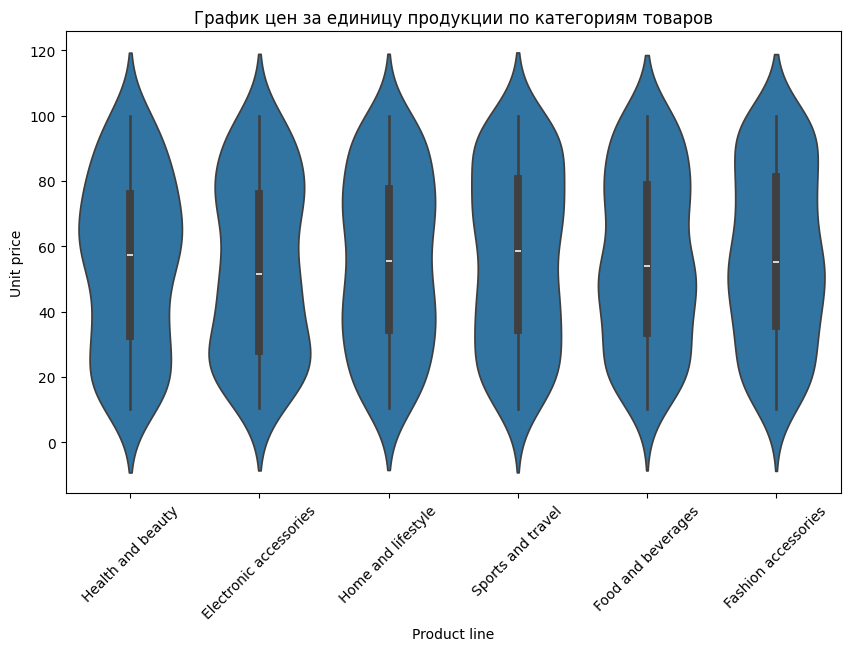

In [ ]:
# Анализ цен товаров
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product line', y='Unit price', data=supermarket)
plt.title('График цен за единицу продукции по категориям товаров')
plt.xticks(rotation=45)
plt.show()

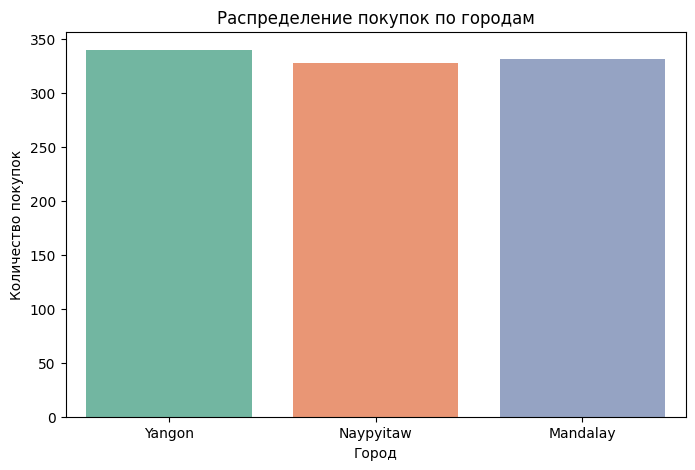

In [ ]:
# Распределение покупок по городам
plt.figure(figsize=(8, 5))
sns.countplot(
    x='City',
    hue='City',
    data=supermarket,
    palette='Set2',
    legend=False
)

plt.title('Распределение покупок по городам')
plt.xlabel('Город')
plt.ylabel('Количество покупок')
plt.show()

In [ ]:
# Подсчет количества покупок по датам
daily_data = supermarket.groupby(['Month', 'Day']).size().reset_index(name='Count')

# Создание столбца для объединения месяца и дня
daily_data['Month-Day'] = daily_data['Month'].astype(str) + '-' + daily_data['Day'].astype(str)

# Построение графика с использованием Plotly
fig = px.line(daily_data, x='Month-Day', y='Count', title='Распределение покупок по датам', markers=True)

# Обновление меток оси X для лучшей читаемости
fig.update_layout(xaxis_title='Дата (Месяц-День)', yaxis_title='Количество покупок', xaxis_tickangle=-45)

# Отображение графика
fig.show()

In [ ]:
# Сравнение средних и суммарных доходов по каждой категории товаров
income_summary = supermarket.groupby('Product line').agg(
    average_income=('Total', 'mean'),
    total_income=('Total', 'sum')
).reset_index()

# График среднего дохода
fig_avg = px.bar(income_summary,
                 x='Product line',
                 y='average_income',
                 title='Средний доход по каждой категории товаров',
                 labels={'average_income': 'Средний доход', 'Product line': 'Категории товаров'},
                 hover_data={'average_income': ':.2f'})  # hover_data позволяет отобразить точные значения

fig_avg.update_layout(xaxis_title='Категории товаров', yaxis_title='Средний доход', bargap=0.2)
fig_avg.show()

# График суммарного дохода
fig_total = px.bar(income_summary,
                   x='Product line',
                   y='total_income',
                   title='Суммарный доход по каждой категории товаров',
                   labels={'total_income': 'Суммарный доход', 'Product line': 'Категории товаров'},
                   hover_data={'total_income': ':.2f'})  # hover_data позволяет отобразить точные значения

fig_total.update_layout(xaxis_title='Категории товаров', yaxis_title='Суммарный доход', bargap=0.2)
fig_total.show()

In [ ]:
# Распределение налогов по покупкам
fig = px.histogram(supermarket,
                   x='Tax 5%',
                   nbins=30,
                   title='Распределение налоговых сборов (5%) по покупкам',
                   labels={'Tax 5%': 'Налог ($)'},
                   color_discrete_sequence=['skyblue'])

# Настройка внешнего вида
fig.update_layout(
    xaxis_title='Налог ($)',
    yaxis_title='Частота',
    bargap=0.1
)

fig.show()

In [ ]:
# Распределение налогов по категориям товаров
fig = px.box(supermarket, x='Product line', y='Tax 5%', color='Product line',
             title='Распределение налогов по категориям товаров',
             labels={'Product line': 'Категория товаров', 'Tax 5%': 'Налог ($)'})

# Поворот меток оси X
fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [ ]:
# Продажи по филиалам
fig = px.box(supermarket, x='Branch', y='Total', title='Продажи по филиалам')
fig.show()

## Визуализация взаимоотношений между парами признаков

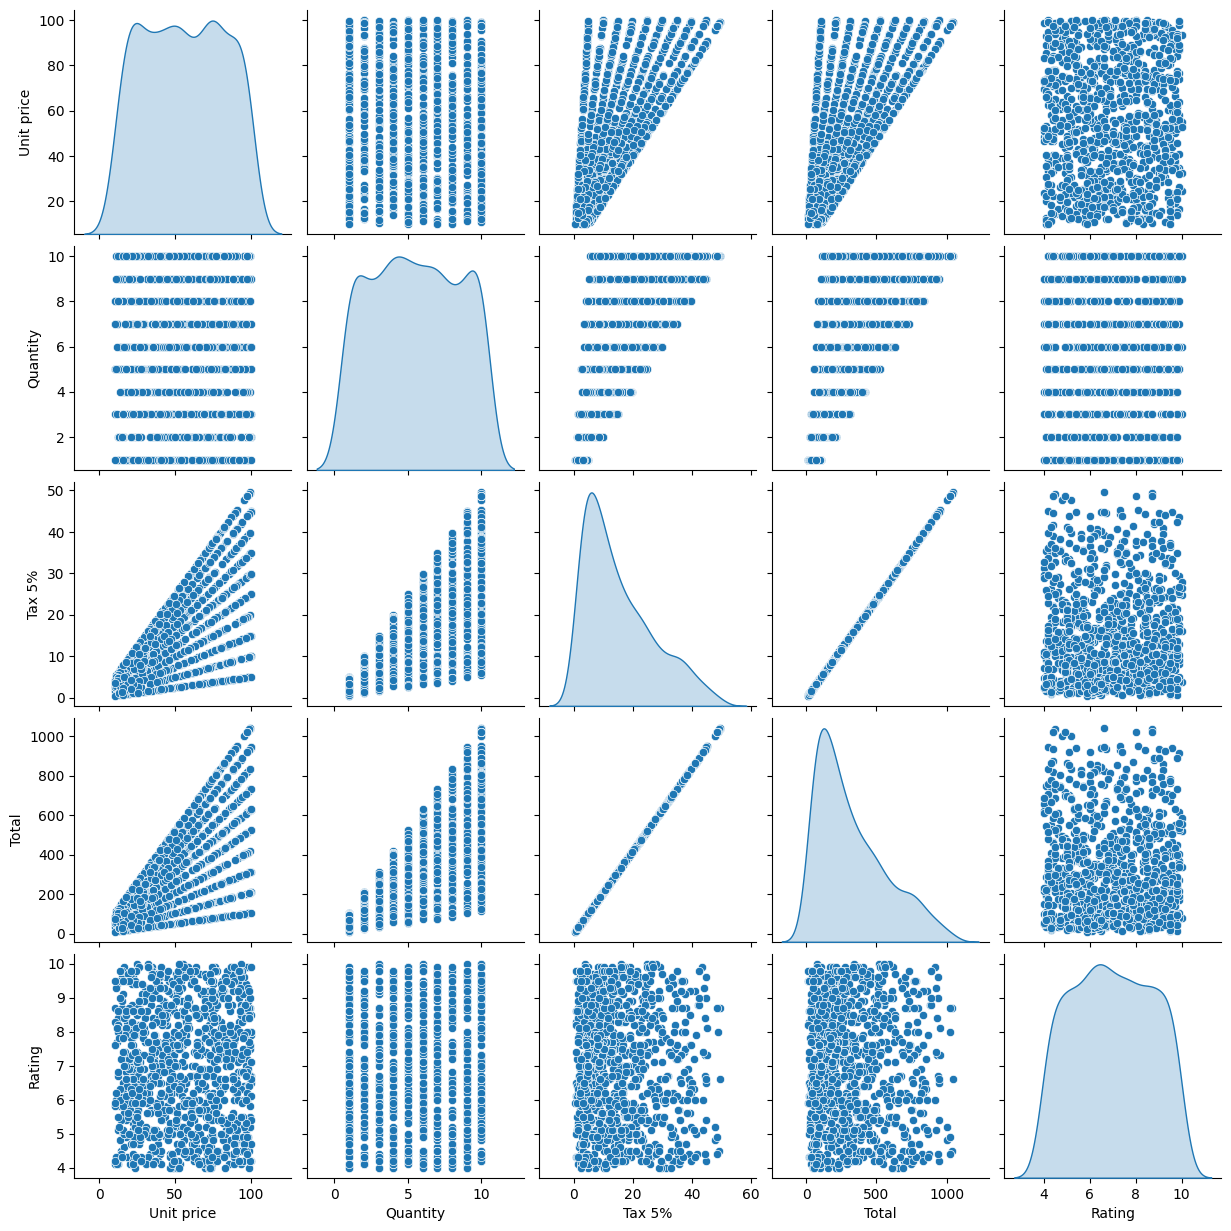

In [ ]:
sns.pairplot(supermarket[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'Rating']], diag_kind='kde')
plt.show()

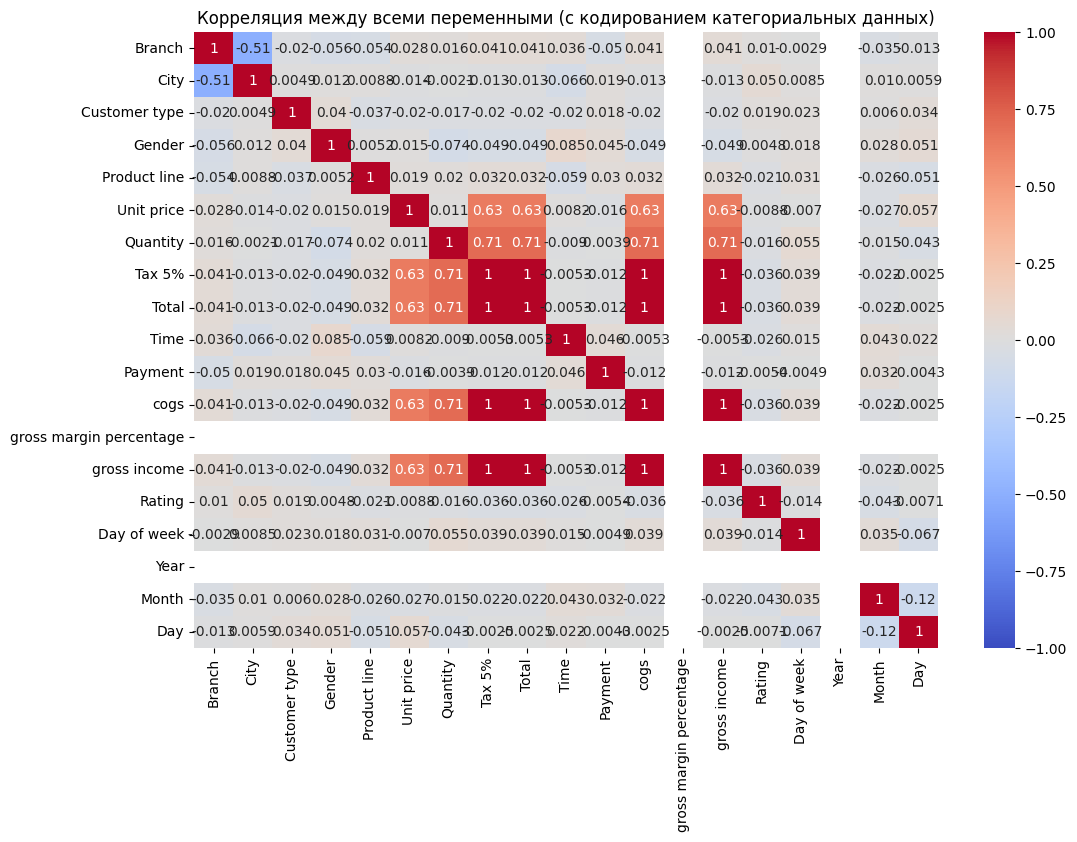

In [ ]:
# Для построения матрицы корреляции между всеми столбцами необходимо
# преобразовать нечисловые данные в числовые
# Копируем данные для преобразования
supermarket_encoded = supermarket.copy()

# Применяем Label Encoding к нечисловым столбцам
le = LabelEncoder()
for column in supermarket_encoded.select_dtypes(include=['object']).columns:
    supermarket_encoded[column] = le.fit_transform(supermarket_encoded[column])

# Построение тепловой карты корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(supermarket_encoded.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между всеми переменными (с кодированием категориальных данных)')
plt.show()

## Пропуски

In [ ]:
supermarket_missing = pd.DataFrame({
    'nun': supermarket.isna().sum(),  # Количество пропущенных значений (NaN)
    'isna': supermarket.isnull().sum(),  # Количество значений nuls
})

supermarket_missing

,nun,isna
Branch,0,0
City,0,0
Customer type,0,0
Gender,0,0
Product line,0,0
Unit price,0,0
Quantity,0,0
Tax 5%,0,0
Total,0,0
Time,0,0


## Выбросы

In [ ]:
supermarket_encoded.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day of week,Year,Month,Day
0,0,2,0,0,3,74.69,7,26.1415,548.9715,146,2,522.83,4.761905,26.1415,9.1,6,2019,1,5
1,2,1,1,0,0,15.28,5,3.8200,80.2200,23,0,76.40,4.761905,3.8200,9.6,5,2019,3,8
2,0,2,1,1,4,46.33,7,16.2155,340.5255,155,1,324.31,4.761905,16.2155,7.4,7,2019,3,3


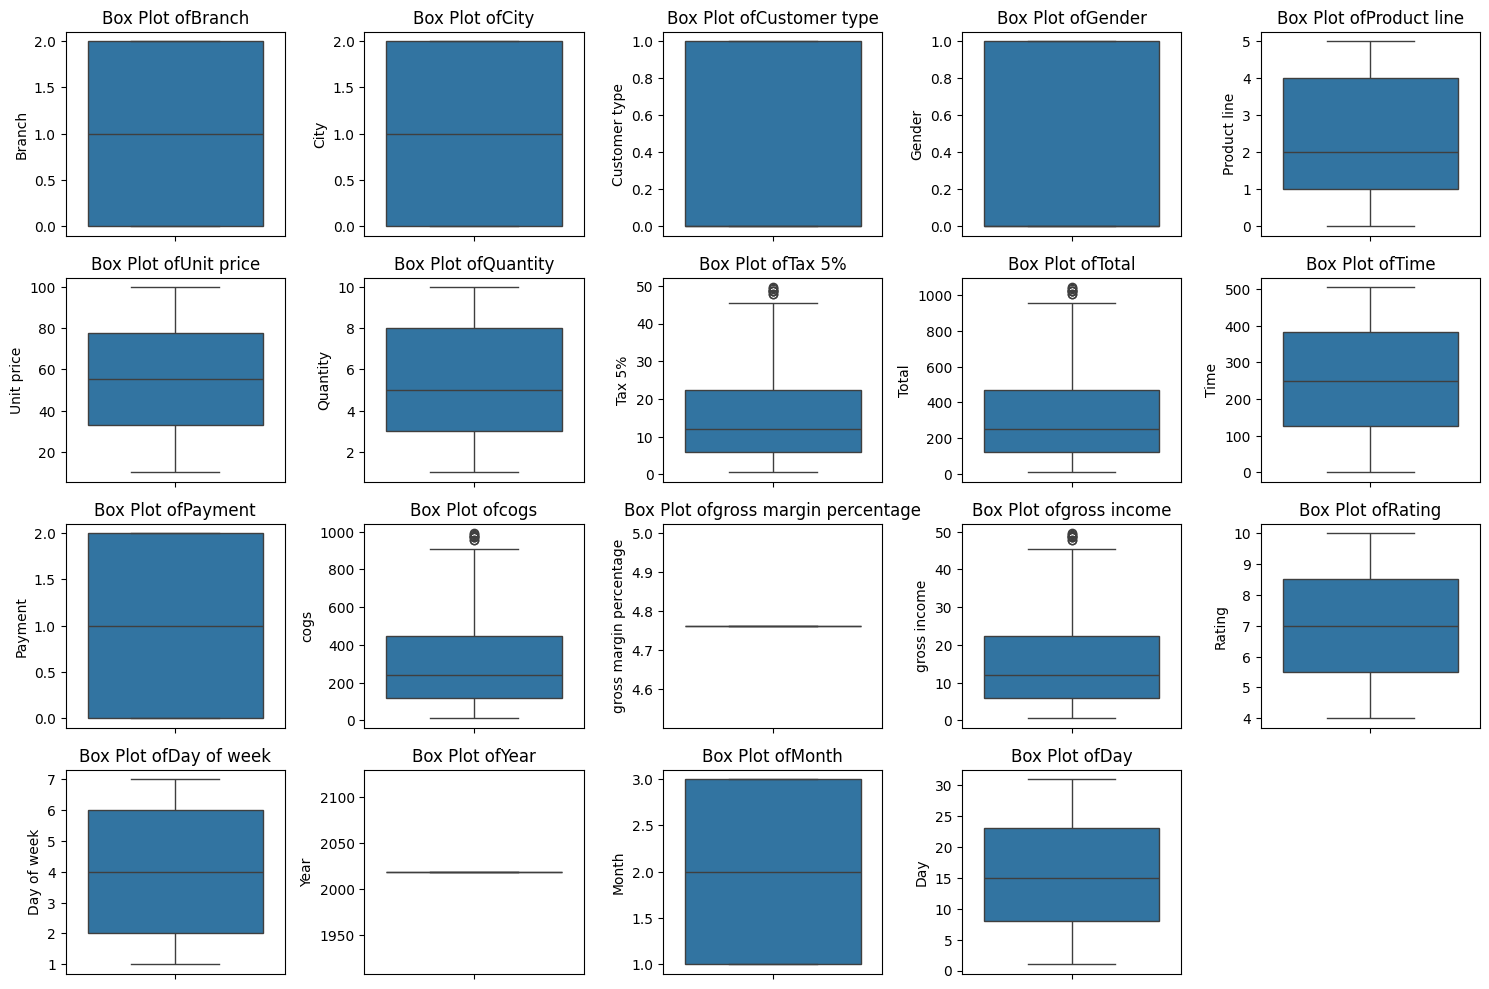

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(supermarket_encoded, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=supermarket_encoded[column])
    plt.title(f'Box Plot of{column}')
plt.tight_layout()
plt.show()

In [ ]:
# Поиск выбросов
results = {'Столбец': [], 'Выбросы': []}

# Расчет IQR
for column in supermarket_encoded:
    Q1 = supermarket_encoded[column].quantile(0.25)
    Q3 = supermarket_encoded[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определение выбросов
    outliers_iqr = supermarket_encoded[column][(supermarket_encoded[column] < Q1 - 1.5 * IQR)]

    # Разультаты
    results['Столбец'].append(column)
    results['Выбросы'].append(outliers_iqr.shape[0])

    # Создание таблицы для наглядности
    df_results = pd.DataFrame(results)

df_results

,Столбец,Выбросы
0,Branch,0
1,City,0
2,Customer type,0
3,Gender,0
4,Product line,0
5,Unit price,0
6,Quantity,0
7,Tax 5%,0
8,Total,0
9,Time,0


## Проверка гипотез

### 1. В определённое время дня совершается больше покупок

In [ ]:
# Разделение данных по времени суток и сравнение количества покупок в каждом временном интервале
# Преобразование времени в числовой формат
supermarket['Hour'] = pd.to_datetime(supermarket['Time'], format='%H:%M', errors='coerce').dt.hour
supermarket['Minute'] = pd.to_datetime(supermarket['Time'], format='%H:%M', errors='coerce').dt.minute

# Разделение данных по времени суток на интервалы
supermarket['Time of Day'] = pd.cut(supermarket['Hour'],
                                     bins=[10, 14, 18, 21],
                                     labels=['Утро', 'День', 'Вечер'],
                                     right=False)  # right=False включает левую границу и исключает правую

# Подсчёт количества покупок в каждом временном интервале
time_of_day_counts = supermarket['Time of Day'].value_counts().reset_index()
time_of_day_counts.columns = ['Time of Day', 'Count']

# Построение графика с использованием Plotly
fig = px.bar(time_of_day_counts, x='Time of Day', y='Count',
             title='Количество покупок в разное время дня',
             labels={'Time of Day': 'Время дня', 'Count': 'Количество покупок'},
             color='Time of Day',
             text='Count')

fig.update_layout(xaxis_title='Время дня', yaxis_title='Количество покупок')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Вывод: в утренние часы (с 10 до 14) совершается большее количество покупок, чем в остальное время.

### 2. В определенный день недели совершается большее количество покупок

In [ ]:
day_of_week = {
    1: 'ПН',
    2: 'ВТ',
    3: 'СР',
    4: 'ЧТ',
    5: 'ПТ',
    6: 'СБ',
    7: 'ВС'
}

In [ ]:
# Количество покупок в определенный день недели
supermarket['Day of week'] = supermarket['Day of week'].map(day_of_week)

# Подсчёт количества покупок в каждом дне недели
day_of_week_counts = supermarket['Day of week'].value_counts().reset_index()
day_of_week_counts.columns = ['Day of Week', 'Count']

# Построение графика с использованием Plotly
fig = px.bar(day_of_week_counts, x='Day of Week', y='Count',
             title='Количество покупок по дням недели',
             labels={'Day of Week': 'День недели', 'Count': 'Количество покупок'},
             color='Day of Week',
             text='Count')

fig.update_layout(xaxis_title='День недели', yaxis_title='Количество покупок')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

Вывод: в субботу совершается наибольшее количество покупок, а в понедельник наименьшее

### 3. В определенный период года совершается больше покупок

In [ ]:
# Извлечение месяца из даты
#supermarket['Month'] = supermarket['Date'].dt.to_period('M').astype(str)

# Подсчёт количества покупок в каждом месяце
month_counts = supermarket['Month'].value_counts().reset_index()
month_counts.columns = ['Month', 'Count']

# Построение графика с использованием Plotly
fig = px.bar(month_counts, x='Month', y='Count',
             title='Количество покупок по месяцам',
             labels={'Month': 'Месяц', 'Count': 'Количество покупок'},
             color='Month',
             text='Count')

fig.update_layout(xaxis_title='Месяц', yaxis_title='Количество покупок')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

### 4. Различия в расходах мужчин и женщин

In [ ]:
# Подсчёт количества покупок у мужчин и у женщин
gender_counts = supermarket['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Построение графика с использованием Plotly
fig = px.bar(gender_counts, x='Gender', y='Count',
             title='Количество покупок по полу',
             labels={'Gender': 'Пол', 'Count': 'Количество покупок'},
             color='Gender',
             text='Count')

fig.update_layout(xaxis_title='Пол', yaxis_title='Количество покупок')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

Вывод: Практически одинковое количество мужчин и женщин совершают покупки.

Но что же чаще покупают мужчины и что чаще покупают женщины?

In [ ]:
# Группировка данных по полу и категориям товаров и подсчет количества покупок
gender_product_counts = supermarket.groupby(['Gender', 'Product line']).size().reset_index(name='Count')

# Построение графика с использованием Plotly
fig = px.bar(gender_product_counts, x='Product line', y='Count', color='Gender',
             title='Количество покупок по категориям товаров по полу',
             labels={'Product line': 'Категория товара', 'Count': 'Количество покупок'},
             barmode='group',
             text='Count')

fig.update_layout(xaxis_title='Категория товара', yaxis_title='Количество покупок')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

Вывод: мужчины чаще всего покупают товары из категории Fashion accessories, а женщины чаще всего покупают товары из категории Health and beauty.

### 5. Влияет ли способ оплаты на размер покупки

In [ ]:
# Вычисление среднего размера покупки по каждому способу оплаты
payment_size_avg = supermarket.groupby('Payment')['Total'].mean().reset_index()

# Построение графика с использованием Plotly
fig = px.bar(payment_size_avg, x='Payment', y='Total',
             title='Средний размер покупки по способу оплаты',
             labels={'Payment': 'Способ оплаты', 'Total': 'Средний размер покупки'},
             text='Total')

fig.update_layout(xaxis_title='Способ оплаты', yaxis_title='Средний размер покупки')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

Вывод: способ оплаты не влияет на размер покупок.

### 6. Чем дороже товар, тем меньше его покупают в большом количестве

In [ ]:
# Подсчёт общего количества проданных единиц для каждого товара
product_sales = supermarket.groupby('Product line').agg({
    'Quantity': 'sum',
    'Unit price': 'mean'
}).reset_index()

# Переименование столбцов для удобства
product_sales.columns = ['Product line', 'Total Quantity Sold', 'Average Unit Price']

# Построение графика с использованием Plotly
fig = px.scatter(product_sales, x='Average Unit Price', y='Total Quantity Sold',
                 title='Зависимость между средней ценой и количеством проданных единиц',
                 labels={'Average Unit Price': 'Средняя цена', 'Total Quantity Sold': 'Общее количество проданных единиц'},
                 size='Total Quantity Sold', color='Product line', hover_name='Product line',
                 size_max=60)

fig.update_layout(xaxis_title='Средняя цена', yaxis_title='Общее количество проданных единиц')
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))

fig.show()

Вывод: Есть ависимость, что чем дороже товар, тем реже его покупают в большом количестве.

# <font color='#0066CC' size='5'> **Построение простых линейных моделей для отбора признаков**

In [ ]:
# Удаление столбца 'Time' после преобразования
supermarket = supermarket.drop(columns=['Time'])

# Преобразование категориальных переменных в числовые
supermarket_encoded = pd.get_dummies(supermarket, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Day of week', 'Time of Day'])

In [ ]:
# Определение признаков (X) и целевой переменной (y)
X = supermarket_encoded.drop('Total', axis=1)
y = supermarket_encoded['Total']

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(supermarket.dtypes)

Branch                       object
City                         object
Customer type                object
Gender                       object
Product line                 object
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total                       float64
Payment                      object
cogs                        float64
gross margin percentage     float64
gross income                float64
Rating                      float64
Day of week                  object
Year                          int32
Month                         int32
Day                           int32
Hour                          int32
Minute                        int32
Time of Day                category
dtype: object


In [ ]:
# Пострение линейной модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Прогноз на тестовой выборке
y_pred = model.predict(X_test)

In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.36781333867518e-26


In [ ]:
# Оценка модели
score = model.score(X_test, y_test)
print("Коэффициент детерминации (R^2):", score)

Коэффициент детерминации (R^2): 1.0


In [ ]:
# Важность признаков
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
3,cogs,1.044776e+00
5,gross income,5.223881e-02
2,Tax 5%,5.223881e-02
1,Quantity,1.754152e-14
23,Product line_Fashion accessories,6.573937e-15
38,Time of Day_Утро,4.769636e-15
26,Product line_Home and lifestyle,4.588839e-15
32,Day of week_ВТ,2.606292e-15
33,Day of week_ПН,1.887054e-15
29,Payment_Credit card,1.329317e-15


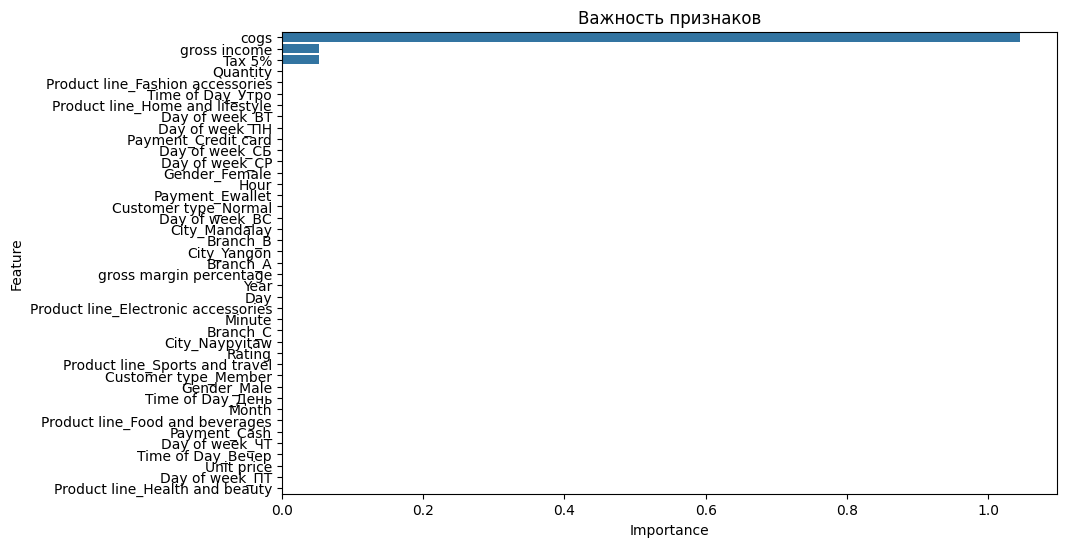

In [ ]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков')
plt.show()

# <font color='#0066CC' size='5'> **Выводы**

Основное влияние на итоговую сумму покупки оказывают признаки, связанные с непосредственно стоимостью покупки (стоимость проданных товаров, валовой доход и налоги).

Признаки, связанные с демографией клиентов (гендер, город) или временными характеристиками, имеют минимальное влияние.

Время покупки и способ оплаты не оказывают существенного влияния на размер покупки, что может свидетельствовать о том, что эти параметры менее важны при анализе продаж в этой конкретной выборке.

Признаки, имеющие низкое влияние, могут быть потенциально исключены из модели для её упрощения.